<a href="https://colab.research.google.com/github/Programapython/detector_osteoartritis/blob/main/practicas/practica3/Practica_03_PDSeI__Convolucion_SOLON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg](https://e.rpp-noticias.io/normal/2015/12/22/285428_50186.jpg)

**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 4: implementación de la convolución
```

## **Practica 4: Implementación de la convolución discreta**

###**4.1. Importación de Librerías**

* **Librerias a utilizar:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import time
from IPython import display
plt.style.use(['dark_background'])

###**4.2. Cálculo de la convolución usando una funcion de alto nivel**

![https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg](https://graphics.stanford.edu/courses/cs178/applets/convolution-equation2-c.jpg)


![https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp](https://qph.fs.quoracdn.net/main-qimg-cb81d3dfbe146b84ebf717ec12722f32.webp)

* **Creación de la señal y el kernel**

In [23]:
senal1 = np.concatenate((np.zeros(30), np.ones(2), np.zeros(20), np.ones(30), 2*np.ones(10), np.zeros(30), -np.ones(10), np.zeros(40)))


kernel = np.exp(-np.linspace(-2, 2, 20)**2)
kernel = kernel/np.sum(kernel)
N = len(senal1)

172

* **Mostrando señales creadas**

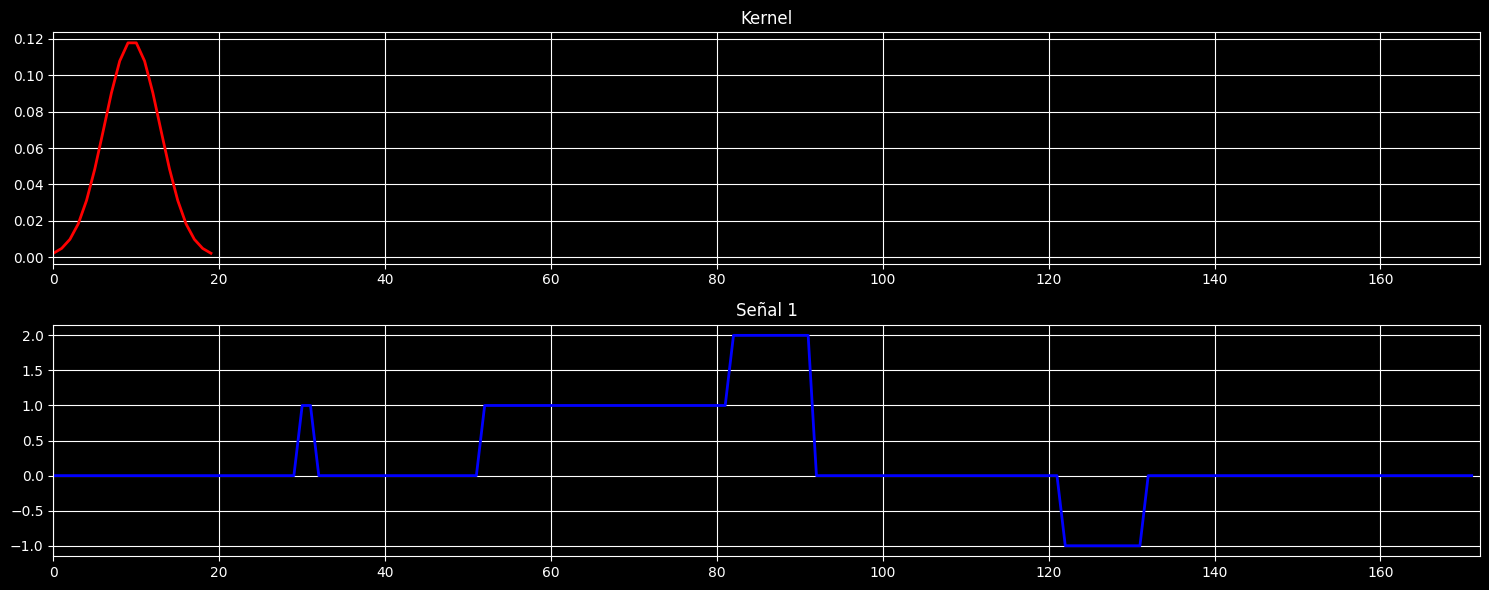

In [17]:
plt.figure(figsize = (15,6))

plt.subplot(211)
plt.plot(kernel, 'r', linewidth=2)
plt.xlim([0,N])
plt.title('Kernel')
plt.grid()

plt.subplot(212)
plt.plot(senal1, 'b', linewidth=2)
plt.xlim([0,N])
plt.title('Señal 1')
plt.grid()

plt.tight_layout()
plt.show()

 * **Cálculo y gráfica de la convolución**

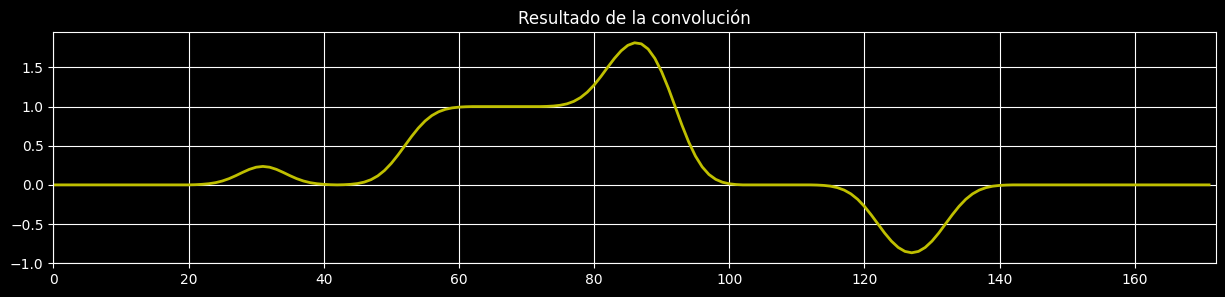

In [18]:
resultado = np.convolve(senal1, kernel, mode='same')

plt.figure(figsize = (15,3))
plt.plot(resultado, 'y', linewidth=2)
plt.xlim([0,N])
plt.title('Resultado de la convolución')
plt.grid()
plt.show()


###**4.2. Detalles de la convolución**
>*Longitud de la convolución de 2 señales.*

>*Efecto del kernel*

* **Creación de señales y aplicación de la convolución**





In [24]:
#Creamos las señales

senal12 = np.zeros(20)
senal12[8:15]  = 1

# Kernel arbitrario

kernel2  = np.array([1,.8,.6,.4,.2])

#Tamaño de la convolucion

nSenal12 = len(senal12)
nKernel2 = len(kernel2)
nConvolucion = nSenal12 + nKernel2 -1

#Aplicacion de la convolucion

resultado2 = np.convolve(senal12, kernel2, 'full')

* **Graficando resultados**

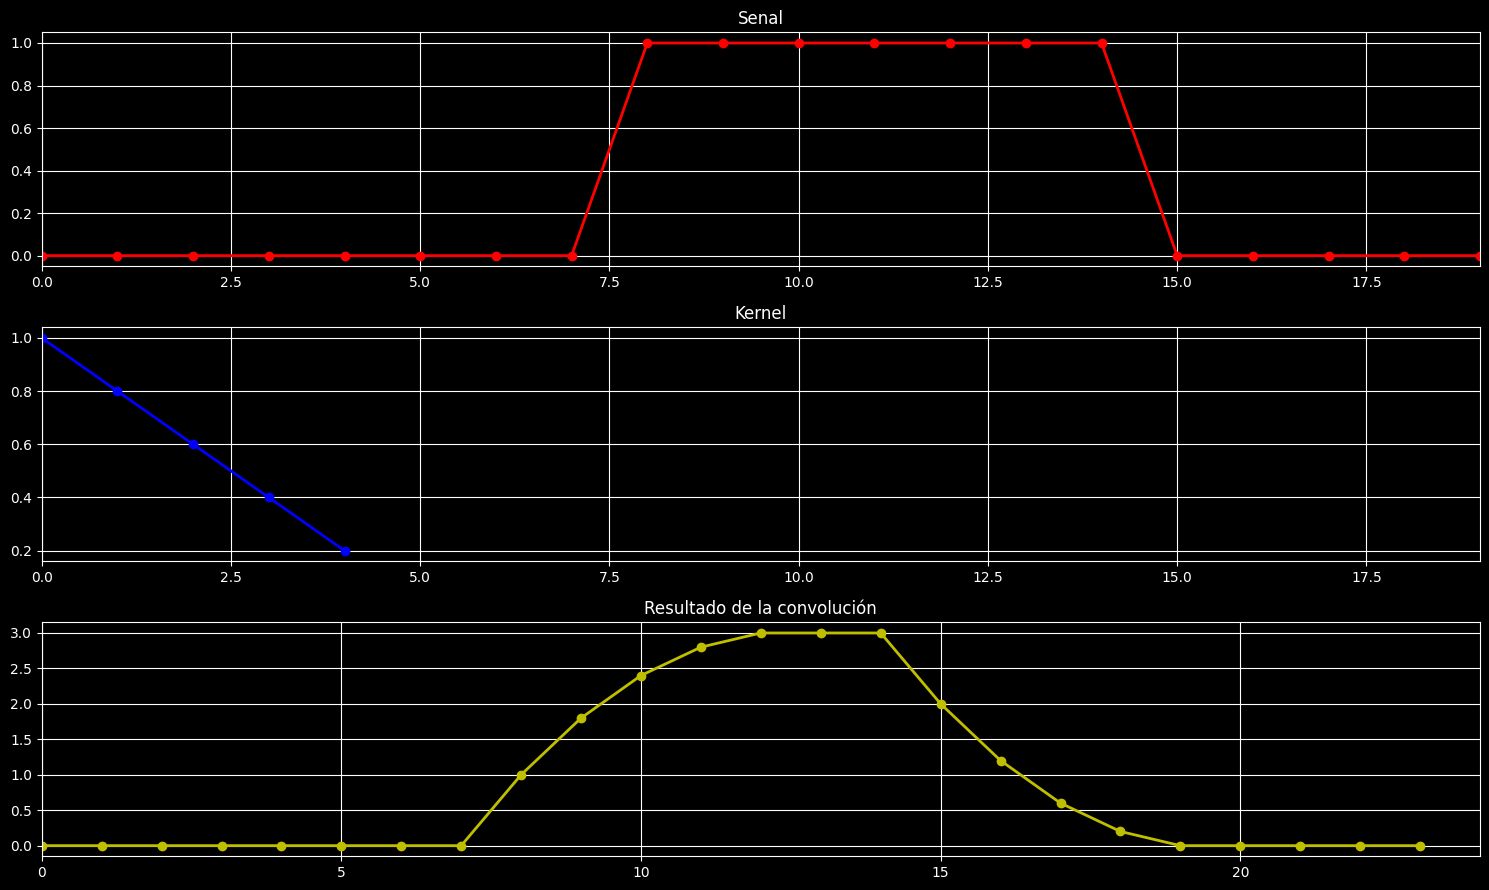

In [25]:
plt.figure(figsize=(15,9))

#Grafica de la señal
plt.subplot(311)
plt.plot(senal12, 'ro-', linewidth=2)
plt.xlim([0,nSenal12-1])
plt.title('Senal')
plt.grid()

plt.subplot(312)
plt.plot(kernel2, 'bo-', linewidth=2)
plt.xlim([0,nSenal12-1])
plt.title('Kernel')
plt.grid()

plt.subplot(313)
plt.plot(resultado2, 'yo-', linewidth=2)
plt.xlim([0,nConvolucion])
plt.title('Resultado de la convolución')
plt.grid()

plt.tight_layout()
plt.show()

###**4.3. Animación de la convolución**

*Se usarán las señales creadas en el apartado anterior*

In [ ]:
import warnings
warnings.filterwarnings('ignore')

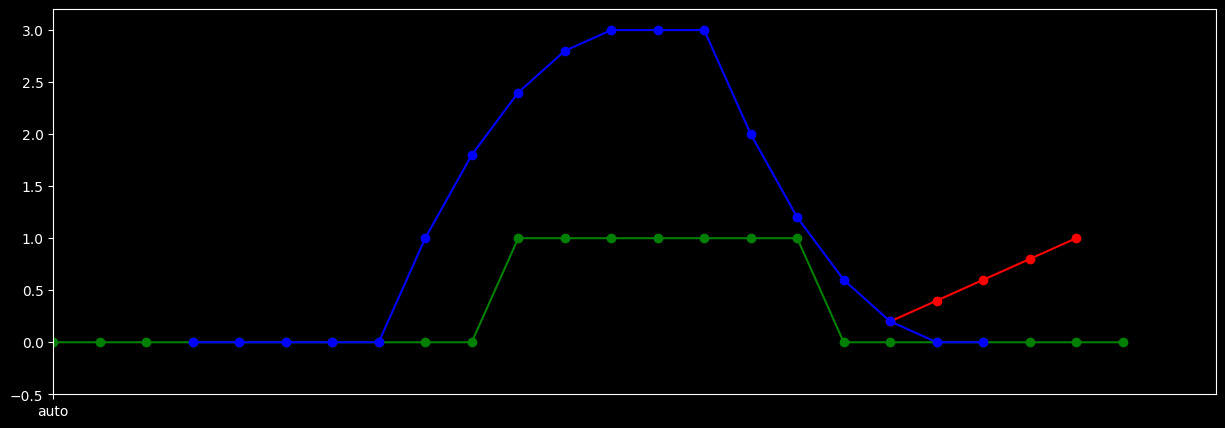

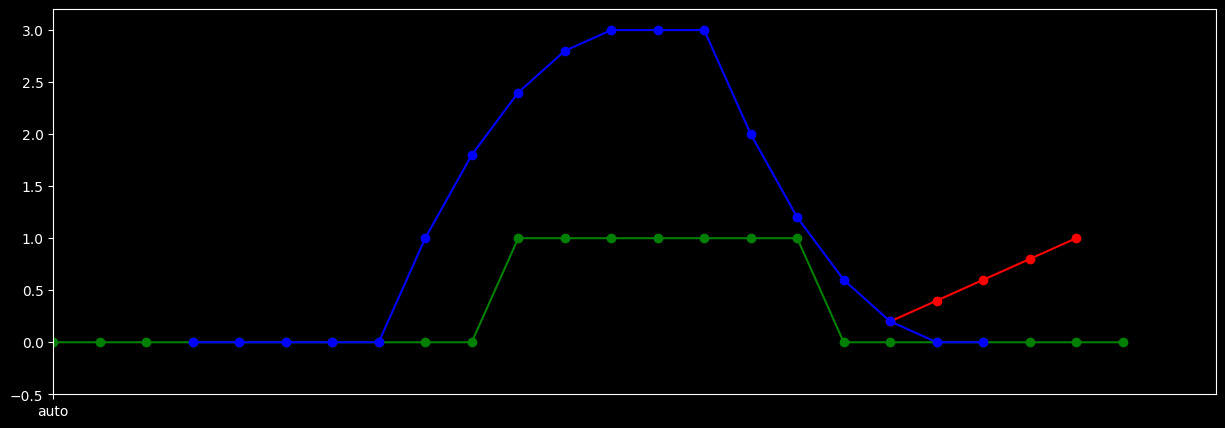

In [31]:
#Se calcula la mitad del kernel
mitad_kernel = int(np.floor(nKernel2/2))

#Invertimos el kernel
kernel_invertido = kernel2[::-1]

#Rellenamos con ceros para almacenar la salida
senal12_pad  = np.concatenate((np.zeros(mitad_kernel), senal12, np.zeros(mitad_kernel)))

#Resultado
conv_resultado = np.zeros(nConvolucion)

#Grafica animada

plt.figure(figsize = (15,5))

for ti in range(mitad_kernel, nConvolucion - mitad_kernel):

  #Extraemos una ventana del tamaño del kernel
  ventana = senal12_pad[ti-mitad_kernel: ti+mitad_kernel+1]

  #Producto entre la ventana y el kernel invertido
  conv_resultado[ti] = np.sum(ventana * kernel_invertido)

  #Graficamos
  plt.cla()
  plt.axis(['auto','auto', -0.5, 3.2])
  plt.plot(senal12_pad,'go-')
  plt.plot(np.arange(ti-mitad_kernel-1, ti+mitad_kernel), kernel_invertido, 'ro-')
  plt.plot(np.arange(mitad_kernel+1,ti), conv_resultado[mitad_kernel+1:ti], 'bo-')
  plt.xlim([0,nConvolucion+1])

  display.clear_output(wait=True)
  display.display(plt.gcf())
  time.sleep(0.5)

conv_resultado = conv_resultado[mitad_kernel:-mitad_kernel]


In [69]:
resultado2_2 = np.convolve(senal12, kernel2, mode='same')
nConvolucion2 = len(resultado2_2)

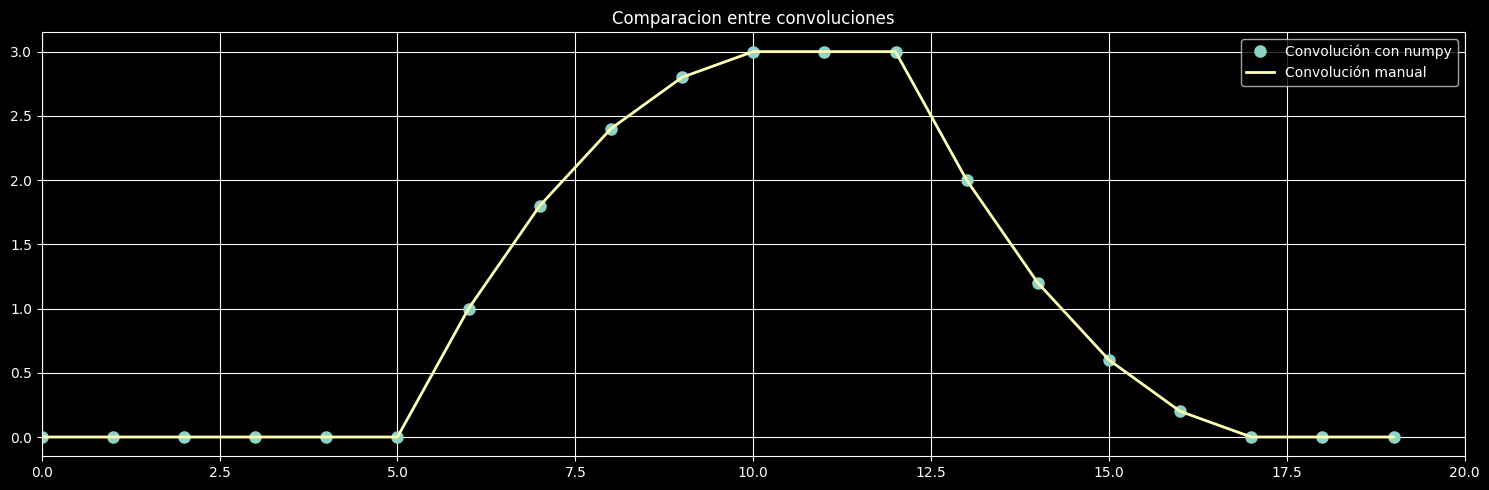

In [76]:
plt.figure(figsize=(15,5))

#Grafica de la señal

plt.plot(resultado2[mitad_kernel:-mitad_kernel], 'o', markersize=8, label='Convolución con numpy')
plt.plot(conv_resultado, '-', linewidth=2, label='Convolución manual')
plt.xlim([0,nConvolucion2])
plt.title('Comparacion entre convoluciones')

plt.tight_layout()
plt.legend()
plt.grid()